<div style="text-align: center;">
    <h1><strong>Physics 129L: Problem Set 4</strong></h1>
</div>

<div style="text-align: center;">
    <h3><strong>Problem Set Submission Guideline</strong></h3>
</div>

**A) Github Submissions**
We will use GitHub for problem set submissions. To access the problem set, please **fork** and **clone** the **forked** repository to your local virtual machine. **Please complete the problem set in this forked directory.** Submit **a pull request** for merging into the main branch before the problem set due date.

**B) .tar.gz File compression and submission on Github**
For each problem set, you are asked to submit the compressed version of the problem set to GitHub via git operation. Here is a step-by-step guideline:

1. Use the **tar** command to compress the problem set directory into a **single** ".tar.gz" file.
2. Obtain the sha256sum by running "sha256sum P2.tar.gz".
3. Echo the **full sha256sum** to a text file named "sha25sum_problem_set.txt".
4. Initialize a git repository named "Archive_P# (#: problem set number) on your local machine, and move both the "tar.gz" file and the "sha25sum_problem_set.txt" file to the repository.
5. Create an empty **public** directory under the **same name** in **your own GitHub account**.
6. **Push** this local repository to the remote repository.

<div style="text-align: center;">
    <h2><strong>Problem 1: Statistical Inference on Biased Coins</strong></h2>
</div>


Let's consider a problem similar to the one we discussed in class. You are given three datasets, each containing 500 coin-flip outcomes represented as **Boolean** values (True means Head, and False means Tail). In this problem, your task is to investigate potential biases in the coin flips within these datasets. To load the dataset, please use the following code: 

In [115]:
import json 
# Define the file path for the JSON file
json_file_path_1 = 'problem_1/dataset_1.json'
json_file_path_2 = 'problem_1/dataset_2.json'
json_file_path_3 = 'problem_1/dataset_3.json'

# Read the boolean data from the JSON file into a Python list
with open(json_file_path_1, 'r') as json_file_1:
    boolean_list_out_1 = json.load(json_file_1)
with open(json_file_path_2, 'r') as json_file_2:
    boolean_list_out_2 = json.load(json_file_2)
with open(json_file_path_3, 'r') as json_file_3:
    boolean_list_out_3 = json.load(json_file_3) 

<div style="text-align: center;">
    <h3><strong> Bayesian Inference </strong></h3>
</div>
<br>
As discussed in class, for a given $p$, the probability that $N=500$ tosses result in $M$ heads and $N-M$ tails is given by the binomial distribution, with the probability mass function, namely the likelyhood function:
<br>
$$ P(M,N|p) = \binom{N}{M} p^{M} (1-p)^{N-M}. $$
<br>
Then the corresponding posterior is given by the Bayes' theorem,
$$ P(p|M,N) \sim \frac{1}{B(M,N)} P(M,N|p)P(p), $$
where,
<br>
$$ B(M,N) = \int_0^1 dp\ p^{M} (1-p)^{N-M} = \frac{\Gamma(M+1)\Gamma(N-M+1)}{\Gamma(N+2)} .$$
<br>
Note that the above integral defines the Beta function, expressed in terms of the Gamma function (factorial, $\Gamma(n+1) = n!$). For more details, please check out https://en.wikipedia.org/wiki/Beta_function). <br>
<br>


## A) 
First, we assume that our initial model for $p$ is a uniform distribution (prior), i.e., $P(p) \sim 1/N$.
<br>

With this prior distribution, apply the Bayesian inference methods discussed in class to calculate the likelihood functions for three datasets named 'problem_1/dataset_1.json,' 'problem_1/dataset_2.json,' and 'problem_1/dataset_3.json.' Subsequently, create a (3,1) plot to visualize the corresponding posterior distributions for each dataset. Additionally, numerically calculate the expectation value and variance of each posterior distribution. (hint: look at the stats.ipynb I provided on Canvas)



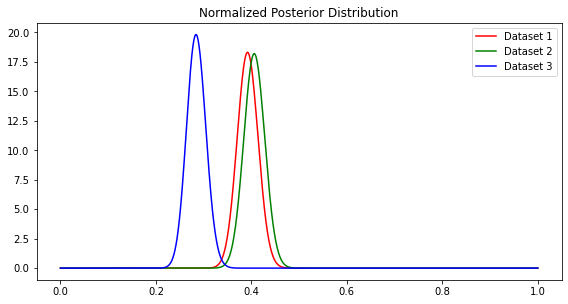

Expectation Value (Dataset 1): 0.392
Variance (Dataset 1): 0.238336
Expectation Value (Dataset 2): 0.406
Variance (Dataset 2): 0.24116400000000002
Expectation Value (Dataset 3): 0.284
Variance (Dataset 3): 0.20334399999999997


In [106]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate expectation values for Boolean datasets
expectation_1 = np.mean(boolean_list_out_1)
expectation_2 = np.mean(boolean_list_out_2)
expectation_3 = np.mean(boolean_list_out_3)

# Define the number of samples N and the parameter space
N = 1000  
p_values = np.linspace(0, 1, N)

# Initialize lists to store the posterior distributions
posterior_1 = []
posterior_2 = []
posterior_3 = []

# Initialize variables to store variances
variance_1 = None
variance_2 = None
variance_3 = None

# Calculate posterior distributions and normalize them for each dataset
for boolean_list in [boolean_list_out_1, boolean_list_out_2, boolean_list_out_3]:
    likelihoods = []

    for p in p_values:
        likelihood = (p**sum(boolean_list)) * ((1 - p)**(len(boolean_list) - sum(boolean_list)))
        likelihoods.append(likelihood)

    # Assuming a uniform prior P(p) ~ 1
    posterior = np.array(likelihoods) / np.sum(likelihoods)

    # Normalize the posterior to make the area under the curve equal to 1
    total_area = np.trapz(posterior, p_values)
    normalized_posterior = posterior / total_area

    if boolean_list == boolean_list_out_1:
        posterior_1 = normalized_posterior
        # Calculate the variance
        variance_1 = expectation_1 * (1 - expectation_1)
    elif boolean_list == boolean_list_out_2:
        posterior_2 = normalized_posterior
        # Calculate the variance
        variance_2 = expectation_2 * (1 - expectation_2)
    elif boolean_list == boolean_list_out_3:
        posterior_3 = normalized_posterior
        # Calculate the variance
        variance_3 = expectation_3 * (1 - expectation_3)

# Create a (3,1) plot
plt.figure(figsize=(8, 12))
plt.subplot(3, 1, 1)
plt.plot(p_values, posterior_1, color="red", label="Dataset 1")
plt.plot(p_values, posterior_2, color="green", label="Dataset 2")
plt.plot(p_values, posterior_3, color="blue", label="Dataset 3")
plt.title("Normalized Posterior Distribution")

plt.tight_layout()
plt.legend()
plt.show()

print(f"Expectation Value (Dataset 1): {expectation_1}")
print(f"Variance (Dataset 1): {variance_1}")
print(f"Expectation Value (Dataset 2): {expectation_2}")
print(f"Variance (Dataset 2): {variance_2}")
print(f"Expectation Value (Dataset 3): {expectation_3}")
print(f"Variance (Dataset 3): {variance_3}")

<div style="text-align: center;">
    <h3><strong> Frequentist Inference: Stirling’s approximation </strong></h3>
</div>
<br>
As we discussed in class, the frequentist inference assumes a fixed $p_{\rm true}$. Maximum Likelihood Estimation (MLE) is a technique used to estimate the parameter $p_{\rm true}$ of a presumed probability distribution (in this case, binomial) based on observed data. It involves maximizing a likelihood function,
<br>
$$ P(M,N|p) = \binom{N}{M} p^{M} (1-p)^{N-M}. $$
<br>
with the objective of making the observed data most likely under the assumed model. In practice, working with the natural logarithm of the likelihood function $P(M,N|p)$, known as the log-likelihood, is often more convenient,
$$\mathcal{P}(M,N|p)=\log [P(M,N|p)]=  \log[\binom{N}{M}]+ M \log(p)+({N-M}) \log(1-p).$$
When $N$ is large, we can approximate the factorial by the Stirling’s approximation,
<br>
$$\log(n!) \approx n\log(n) - n + \frac{1}{2}\log(2\pi n).$$
<br>

## B) 
Numerically check the Stirling’s approximation by compute both sides of the above equation and make a (2,1) plot that shows the following: 1) for factorial, vary N from 1 to 10 and calculate each value then make a scatter plot. Plot a **smooth curve** that shows the Stirling’s formula (remember, the Stirling’s formula takes real values) and the Gamma function $\Gamma(N+1)$. 2) plot the difference between the Stirling’s formula and the Gamma function. Please label your plot. 

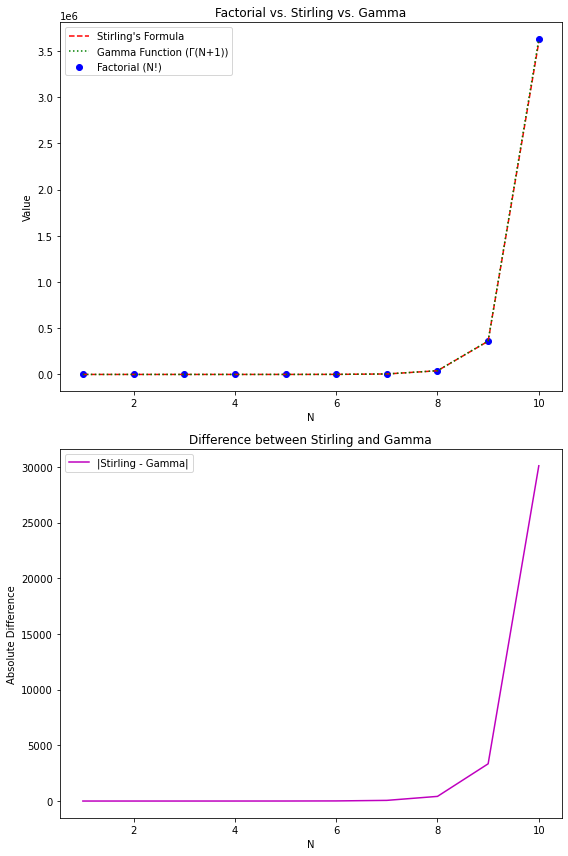

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.special import gamma

# Define a function to calculate the factorial of N
def factorial(N):
    if N == 0:
        return 1
    result = 1
    for i in range(1, N + 1):
        result *= i
    return result

# Create an array of N values from 1 to 10
N_values = np.arange(1, 11)

# Calculate factorial, Stirling's formula, and Gamma function for each N
factorial_values = [factorial(N) for N in N_values]
stirling_values = [np.sqrt(2 * np.pi * N) * (N / np.e)**N for N in N_values]
gamma_values = [gamma(N + 1) for N in N_values]

# Calculate the difference between Stirling's formula and the Gamma function
difference_values = [abs(stirling - gamma) for stirling, gamma in zip(stirling_values, gamma_values)]

# Create a (2,1) plot
plt.figure(figsize=(8, 12))

# Subplot 1: Factorial, Stirling's formula, and Gamma function
plt.subplot(2, 1, 1)
plt.scatter(N_values, factorial_values, label='Factorial (N!)', marker='o', color='b')
plt.plot(N_values, stirling_values, label="Stirling's Formula", linestyle='--', color='r')
plt.plot(N_values, gamma_values, label='Gamma Function (Γ(N+1))', linestyle=':', color='g')
plt.legend()
plt.title('Factorial vs. Stirling vs. Gamma')
plt.xlabel('N')
plt.ylabel('Value')

# Subplot 2: Difference between Stirling's formula and Gamma function
plt.subplot(2, 1, 2)
plt.plot(N_values, difference_values, label='|Stirling - Gamma|', color='m')
plt.legend()
plt.title('Difference between Stirling and Gamma')
plt.xlabel('N')
plt.ylabel('Absolute Difference')

plt.tight_layout()
plt.show()

In [114]:
# Count the number of True values in the three lists
count_true_1 = boolean_list_out_1.count(True)
count_true_2 = boolean_list_out_2.count(True)
count_true_3 = boolean_list_out_3.count(True)

# Print the results
print("Number of True values in the First Data Set (M)):", count_true_1)
print("Number of True values in the Second Data Set (M)):", count_true_2)
print("Number of True values in the Third Data Set (M)):", count_true_3)

# Count the number of False values in the three lists
count_false_1 = boolean_list_out_1.count(False)
count_false_2 = boolean_list_out_2.count(False)
count_false_3 = boolean_list_out_3.count(False)

# Print the results
print("Number of False values in the First Data Set (N)):", count_false_1)
print("Number of False values in the Second Data Set (N)):", count_false_2)
print("Number of False values in the Third Data Set (N)):", count_false_3)

Number of True values in the First Data Set (M)): 196
Number of True values in the Second Data Set (M)): 203
Number of True values in the Third Data Set (M)): 142
Number of False values in the First Data Set (N)): 304
Number of False values in the Second Data Set (N)): 297
Number of False values in the Third Data Set (N)): 358


<div style="text-align: center;">
    <h3><strong> Frequentist Inference: Maximum Likelihood Estimation </strong></h3>
</div>
<br>
Maximum Likelihood Estimation is given by the condition,
$$\frac{ \partial  }{ \partial  p} \mathcal{P}(M,N|p)=0.$$


## C)
Calculate the above condition **analytically**,
<br><br> **Steps:** $\frac{\partial}{\partial p}(P(M, N|p)$ = 
$\frac{\partial}{\partial p}\binom{N}{M}p^{M}(1-p)^{N-M}$ =
$\binom{N}{M}Mp^{M-1}(1-p)^{N-m} + \binom{N}{M}p^{M}(N-M)(1-p)^{N-M-1}(-1)$ = 
$\binom{N}{M}Mp^{M-1}(1-p)^{N-m} - \binom{N}{M}p^{M}(N-M)(1-p)^{N-M-1}$
<br>

What is the $p_{\rm max}$ for the above three datasets? 
<br>

**Data set 1:** $p_{max}$ = 0.28

**Data set 2:** $p_{max}$ = 0.41


**Data set 3:** $p_{max}$ = 0.40

## D) 
Using the method discussed in the class to find the maximum likelyhood function **numerically** for all three datasets. Plot three maximum likelyhood functions in three different subplots, and also plot the $p_{\rm max}$ above. (hint: look at the stats.ipynb). What do you find?

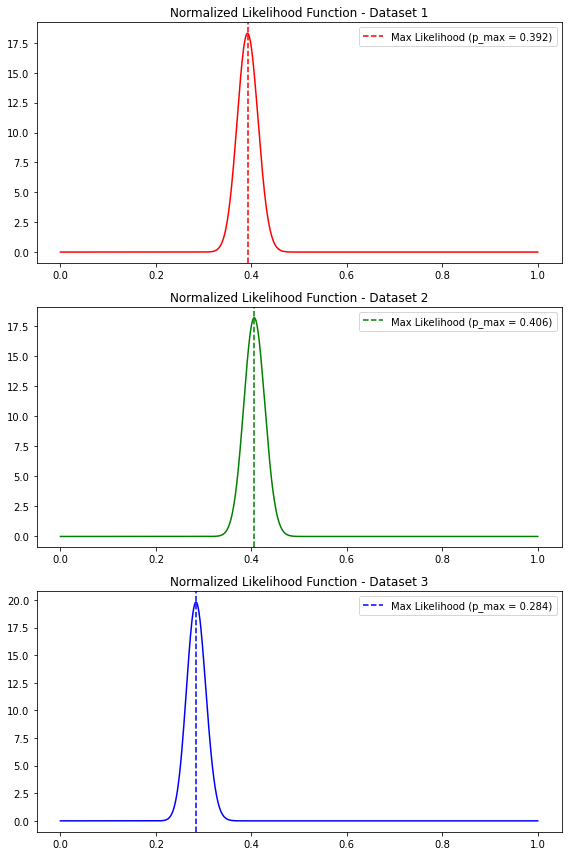

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of samples N and the parameter space
N = 1000  # You need to set the appropriate value
p_values = np.linspace(0, 1, N)

# Initialize lists to store the likelihood functions and their maxima
likelihood_1 = []
likelihood_2 = []
likelihood_3 = []
max_likelihood_1 = None
max_likelihood_2 = None
max_likelihood_3 = None

# Calculate likelihood functions and find their maxima for each dataset
for boolean_list in [boolean_list_out_1, boolean_list_out_2, boolean_list_out_3]:
    likelihoods = []

    for p in p_values:
        likelihood = (p**sum(boolean_list)) * ((1 - p)**(len(boolean_list) - sum(boolean_list)))
        likelihoods.append(likelihood)

    max_likelihood = max(likelihoods)  # Find the maximum likelihood value

    # Normalize the likelihoods to make the area under the curve equal to 1
    total_area = np.trapz(likelihoods, p_values)
    normalized_likelihoods = [likelihood / total_area for likelihood in likelihoods]

    if boolean_list == boolean_list_out_1:
        likelihood_1 = normalized_likelihoods
        max_likelihood_1 = p_values[np.argmax(likelihoods)]
    elif boolean_list == boolean_list_out_2:
        likelihood_2 = normalized_likelihoods
        max_likelihood_2 = p_values[np.argmax(likelihoods)]
    elif boolean_list == boolean_list_out_3:
        likelihood_3 = normalized_likelihoods
        max_likelihood_3 = p_values[np.argmax(likelihoods)]

# Create a (3,1) plot for normalized likelihood functions
plt.figure(figsize=(8, 12))

# Subplot 1: Normalized Likelihood for Dataset 1
plt.subplot(3, 1, 1)
plt.plot(p_values, likelihood_1, color='red')
plt.axvline(x=max_likelihood_1, color='red', linestyle='--', label=f'Max Likelihood (p_max = {max_likelihood_1:.3f})')
plt.title('Normalized Likelihood Function - Dataset 1')
plt.legend()

# Subplot 2: Normalized Likelihood for Dataset 2
plt.subplot(3, 1, 2)
plt.plot(p_values, likelihood_2, color='green')
plt.axvline(x=max_likelihood_2, color='green', linestyle='--', label=f'Max Likelihood (p_max = {max_likelihood_2:.3f})')
plt.title('Normalized Likelihood Function - Dataset 2')
plt.legend()

# Subplot 3: Normalized Likelihood for Dataset 3
plt.subplot(3, 1, 3)
plt.plot(p_values, likelihood_3, color='blue')
plt.axvline(x=max_likelihood_3, color='blue', linestyle='--', label=f'Max Likelihood (p_max = {max_likelihood_3:.3f})')
plt.title('Normalized Likelihood Function - Dataset 3')
plt.legend()

plt.tight_layout()
plt.show()

The calculated value matches pretty well with the plot for the second data set, though the values for the first and third data set have some variation. 

<div style="text-align: center;">
    <h3><strong>  Bootstrapping </strong></h3>
</div>
<br>
Bootstrapping belongs to the wider category of resampling methods and involves any test or metric that employs random sampling with replacement, effectively replicating the sampling process (https://en.wikipedia.org/wiki/Bootstrapping_(statistics)),

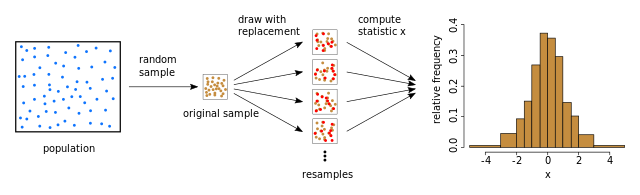
<br>
This process involves a substantial number of iterations, and for each of these bootstrap samples, we compute its expectation value or other statistical properties. The distribution of these expectation values or other statistical properties then provides insights into the characteristics of the underlying distribution. 

## E) 
Bootstrap three datasets 100 times each with sample sizes of 5, 15, 40, 60, 90, 150, 210, 300, and 400, and create a (3,3) histogram (so there will be a total of three (3,3) histograms). Calculate the expectation value and variance for each and label the subplot title with the sample size. 



Dataset 1:
Expectation Value: 0.30
Variance: 0.04
Dataset 2:
Expectation Value: 0.29
Variance: 0.04
Dataset 3:
Expectation Value: 0.29
Variance: 0.04
------------------------------


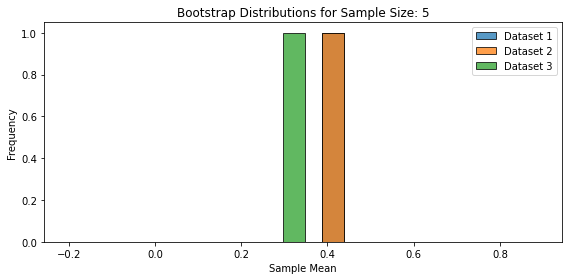

Dataset 1:
Expectation Value: 0.30
Variance: 0.02
Dataset 2:
Expectation Value: 0.29
Variance: 0.02
Dataset 3:
Expectation Value: 0.29
Variance: 0.01
------------------------------


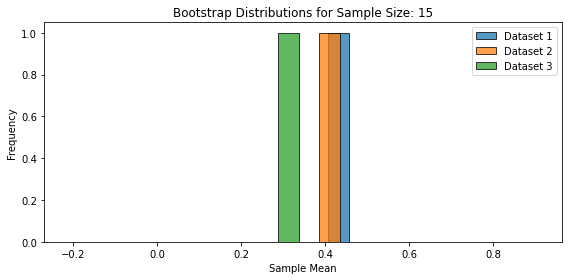

Dataset 1:
Expectation Value: 0.30
Variance: 0.01
Dataset 2:
Expectation Value: 0.29
Variance: 0.01
Dataset 3:
Expectation Value: 0.29
Variance: 0.00
------------------------------


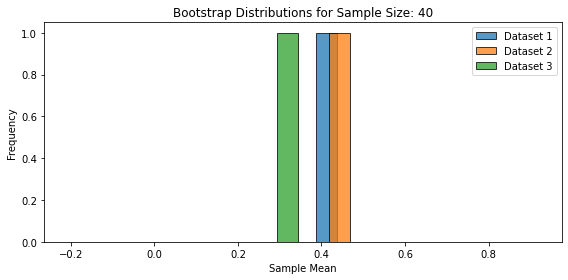

Dataset 1:
Expectation Value: 0.30
Variance: 0.00
Dataset 2:
Expectation Value: 0.29
Variance: 0.00
Dataset 3:
Expectation Value: 0.29
Variance: 0.00
------------------------------


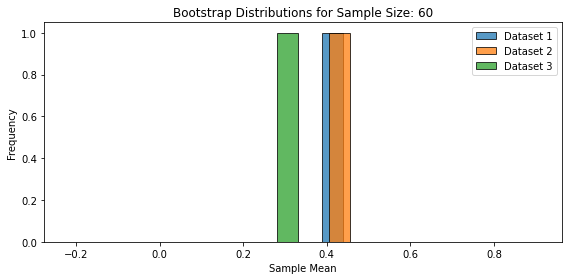

Dataset 1:
Expectation Value: 0.30
Variance: 0.00
Dataset 2:
Expectation Value: 0.29
Variance: 0.00
Dataset 3:
Expectation Value: 0.29
Variance: 0.00
------------------------------


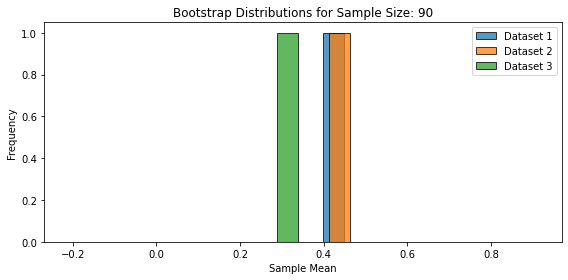

Dataset 1:
Expectation Value: 0.30
Variance: 0.00
Dataset 2:
Expectation Value: 0.29
Variance: 0.00
Dataset 3:
Expectation Value: 0.29
Variance: 0.00
------------------------------


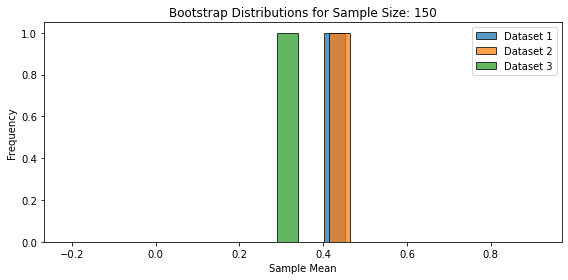

Dataset 1:
Expectation Value: 0.30
Variance: 0.00
Dataset 2:
Expectation Value: 0.29
Variance: 0.00
Dataset 3:
Expectation Value: 0.29
Variance: 0.00
------------------------------


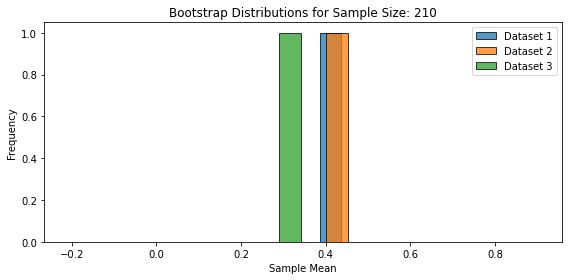

Dataset 1:
Expectation Value: 0.30
Variance: 0.00
Dataset 2:
Expectation Value: 0.29
Variance: 0.00
Dataset 3:
Expectation Value: 0.29
Variance: 0.00
------------------------------


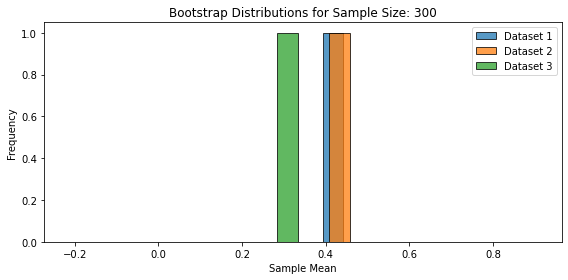

Dataset 1:
Expectation Value: 0.30
Variance: 0.00
Dataset 2:
Expectation Value: 0.29
Variance: 0.00
Dataset 3:
Expectation Value: 0.29
Variance: 0.00
------------------------------


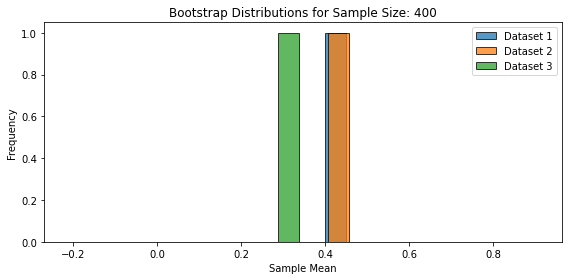

In [97]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of bootstrap samples
num_bootstrap_samples = 100

# Define the sample sizes for bootstrapping
sample_sizes = [5, 15, 40, 60, 90, 150, 210, 300, 400]

# Initialize lists to store results
bootstrap_means = []
bootstrap_variances = []

# Bootstrap each dataset
for boolean_list in [boolean_list_out_1, boolean_list_out_2, boolean_list_out_3]:
    means = []
    variances = []

    for sample_size in sample_sizes:
        sample_means = []

        for _ in range(num_bootstrap_samples):
            # Generate a bootstrap sample
            bootstrap_sample = np.random.choice(boolean_list, size=sample_size, replace=True)
            sample_mean = np.mean(bootstrap_sample)
            sample_means.append(sample_mean)

        # Calculate expectation value and variance for this sample size
        mean = np.mean(sample_means)
        variance = np.var(sample_means)

        means.append(mean)
        variances.append(variance)

    bootstrap_means.append(means)
    bootstrap_variances.append(variances)

# Create 9 separate plots, one for each sample size
for sample_size_idx, sample_size in enumerate(sample_sizes):
    plt.figure(figsize=(8, 4))
    plt.title(f'Bootstrap Distributions for Sample Size: {sample_size}')

    for dataset_idx, label in enumerate(['Dataset 1', 'Dataset 2', 'Dataset 3']):
        sample_means = bootstrap_means[dataset_idx]
        plt.hist(sample_means[sample_size_idx], bins=20, edgecolor='k', alpha=0.75, label=label)

    plt.xlabel('Sample Mean')
    plt.ylabel('Frequency')
    plt.legend()

    # Calculate and print the expectation value and variance for all three datasets
    for dataset_idx, label in enumerate(['Dataset 1', 'Dataset 2', 'Dataset 3']):
        exp_value = sample_means[dataset_idx]
        sample_variance = bootstrap_variances[dataset_idx][sample_size_idx]
        print(f'{label}:')
        print(f'Expectation Value: {exp_value:.2f}')
        print(f'Variance: {sample_variance:.2f}')
    
    print('-' * 30)

    plt.tight_layout()
    plt.show()

## F) 
Plot the expectation values and variances of the above in comparison with the one you have calculated in **C)**. Are there any difference? and is that what you expected? why? 

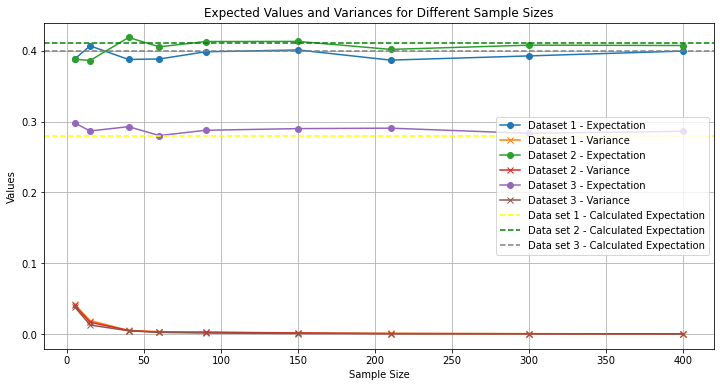

In [164]:
# Plot the expected values and variances for each dataset
plt.figure(figsize=(12, 6))
for dataset_idx, label in enumerate(['Dataset 1', 'Dataset 2', 'Dataset 3']):
    plt.plot(sample_sizes, bootstrap_means[dataset_idx], marker='o', label=f'{label} - Expectation')
    plt.plot(sample_sizes, bootstrap_variances[dataset_idx], marker='x', label=f'{label} - Variance')
plt.axhline(y=0.28, color='yellow', linestyle='--', label='Data set 1 - Calculated Expectation')
plt.axhline(y=0.41, color='green', linestyle='--', label='Data set 2 - Calculated Expectation')
plt.axhline(y=0.40, color='grey', linestyle='--', label='Data set 3 - Calculated Expectation')
plt.xlabel('Sample Size')
plt.ylabel('Values')
plt.title('Expected Values and Variances for Different Sample Sizes')
plt.legend()
plt.grid()
plt.show()

The calculated values match most closely with the values that we derive using the largest sample size. This makes sense since by increasing our sample size, we are getting a more accurate understanding of our functions, as the significance of outliers are minimized

<div style="text-align: center;">
    <h2><strong> Particle Decay </strong></h2>
</div>

Unstable particles are emitted from a source and undergo decay at a distance $x$, a continuous real number following an exponential probability distribution with a characteristic length $\lambda$. Decay events can be detected only if they happen within a range extending from $x = 1$ to $x = \infty$, (a.u.). A total of $N$ decay events are observed at positions {$x_1$, ... , $x_N$}.
<br>

<div style="text-align: center;">
    <h3><strong> Decay Process: Probability density function  </strong></h3>
</div>
<br>
For a given decay parameter, $\lambda$, the probability of observing a particle at a distance $x$ is given by an exponential function, <br>
​
\begin{equation}
P(x\ |\ \lambda) = \frac{1}{ Z(\lambda)} \frac{1}{\lambda}e^{-x/\lambda}\ \ \ \ \ \ 0 < x < \infty
\end{equation}
​
where
$$ Z(\lambda) = \int_0^\infty dx \frac{1}{\lambda}e^{-x/\lambda} = e^{-1/\lambda} . $$

## A)
Define a particle class that takes a single input, named decay constant. Write the probability density function (given a fixed $\lambda$) showing above as a method ('pdf_decay') of the class. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import math

class Particle:
    def __init__(self, decay_constant):
        self.decay_constant = decay_constant

    def pdf_decay(self, t):
        """
        Calculate the probability density function (PDF) for exponential decay at time t
        with a fixed decay constant (λ).

        Parameters:
        t (float): Time at which to calculate the PDF.

        Returns:
        float: The PDF value at time t.
        """
        if t < 0:
            return 0  # Probability density is zero for negative time

        return self.decay_constant * math.exp(-self.decay_constant * t)

## B)
Define four particles as class objects with decay constants [0.4,1,2,3]. Plot the pdf curves $P(x\ |\ \lambda) $ and label them (in a single plot). (hint: you may want to define different class methods to output the value). 

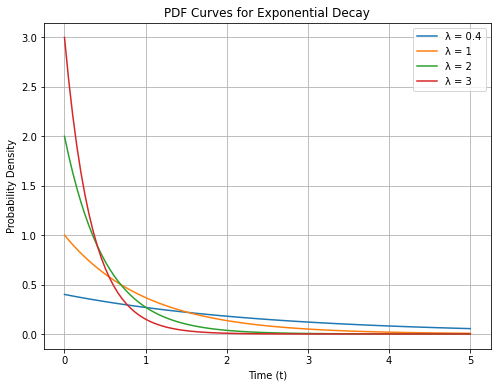

In [73]:
import math
import numpy as np
import matplotlib.pyplot as plt

class Particle:
    def __init__(self, decay_constant):
        self.decay_constant = decay_constant

    def pdf_decay(self, t):
        """
        Calculate the probability density function (PDF) for exponential decay at time t.

        Parameters:
        t (float or numpy array): Time at which to calculate the PDF.

        Returns:
        float or numpy array: The PDF value at time t.
        """
        if isinstance(t, (int, float)):
            t = np.array([t])
        
        pdf_values = self.decay_constant * np.exp(-self.decay_constant * t)
        
        return pdf_values

# Define decay constants for four particles
decay_constants = [0.4, 1, 2, 3]

# Time points for the PDF curve
t = np.linspace(0, 5, 100)

# Create particle objects and calculate PDF values
pdf_curves = []
for decay_constant in decay_constants:
    particle = Particle(decay_constant)
    pdf = particle.pdf_decay(t)  # Use the instance method
    pdf_curves.append(pdf)

# Plot all the PDF curves on a single graph
plt.figure(figsize=(8, 6))
for i, pdf in enumerate(pdf_curves):
    plt.plot(t, pdf, label=f'λ = {decay_constants[i]}')

plt.title("PDF Curves for Exponential Decay")
plt.xlabel("Time (t)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()

## C)
Write the probability density function $P(x\ |\ \lambda) $ (given a fixed position $x$) showing above as a **new method** in the particle class. Define four particles as class objects with fixed positions [2,5,7,10]. Plot the pdf curves and label them (in a single plot).

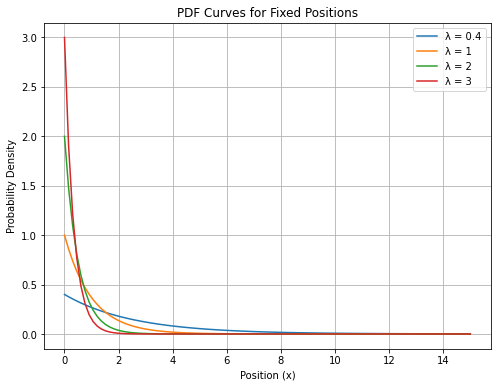

In [74]:
import math
import numpy as np
import matplotlib.pyplot as plt

class Particle:
    def __init__(self, decay_constant, position):
        self.decay_constant = decay_constant
        self.position = position

    def pdf_decay(self, t):
        """
        Calculate the probability density function (PDF) for exponential decay at time t.

        Parameters:
        t (float or numpy array): Time at which to calculate the PDF.

        Returns:
        float or numpy array: The PDF value at time t.
        """
        if isinstance(t, (int, float)):
            t = np.array([t])

        pdf_values = self.decay_constant * np.exp(-self.decay_constant * t)
        return pdf_values

    def pdf_position(self, x):
        """
        Calculate the probability density function (PDF) for a fixed position x.

        Parameters:
        x (float or numpy array): Position at which to calculate the PDF.

        Returns:
        float or numpy array: The PDF value at position x.
        """
        if isinstance(x, (int, float)):
            x = np.array([x])

        pdf_values = self.decay_constant * np.exp(-self.decay_constant * x)
        return pdf_values

# Define decay constants for four particles
decay_constants = [0.4, 1, 2, 3]
# Define fixed positions for the particles
positions = [2, 5, 7, 10]

# Position points for the PDF curve
x = np.linspace(0, 15, 100)

# Create particle objects and calculate PDF values for positions
pdf_curves = []
for decay_constant in decay_constants:
    particle = Particle(decay_constant, None)
    pdf = particle.pdf_position(x)  # Use the instance method with an array of positions
    pdf_curves.append(pdf)

# Plot all the PDF curves on a single graph
plt.figure(figsize=(8, 6))
for i, pdf in enumerate(pdf_curves):
    plt.plot(x, pdf, label=f'λ = {decay_constants[i]}')

plt.title("PDF Curves for Fixed Positions")
plt.xlabel("Position (x)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()

## D)
Define a **new method** in the particle class that generate a 3D surface Plot $P(x\ |\ \lambda) $ as a function of $x$ and $\lambda$. You should create the surface plot in '.png' format, and output the image to a user provided path.


In [90]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class Particle:
    def __init__(self, decay_constant, position):
        self.decay_constant = decay_constant
        self.position = position

    def pdf_position(self, x, lambda_value):
        """
        Calculate the probability density function (PDF) for a fixed position x and lambda value.

        Parameters:
        x (float or numpy array): Position at which to calculate the PDF.
        lambda_value (float): The decay constant (lambda).

        Returns:
        float or numpy array: The PDF value at position x for the given lambda value.
        """
        return lambda_value * np.exp(-lambda_value * x)

    def generate_surface_plot(self, lambda_range, x_range, save_path):
        """
        Generate a 3D surface plot of the probability density function (PDF) P(x | λ) as a function of x and λ.

        Parameters:
        lambda_range (tuple): Range of lambda values (e.g., (0.1, 5)).
        x_range (tuple): Range of x values (e.g., (0, 15)).
        save_path (str): Path to save the '.png' image.
        """
        lambda_values = np.linspace(lambda_range[0], lambda_range[1], 100)
        x_values = np.linspace(x_range[0], x_range[1], 100)
        X, Y = np.meshgrid(x_values, lambda_values)
        Z = self.pdf_position(X, Y)

        fig = plt.figure(figsize=(10, 8))
        ax = fig.gca(projection='3d')
        ax.plot_surface(X, Y, Z, cmap='viridis')

        ax.set_xlabel('Position (x)')
        ax.set_ylabel('λ (Decay Constant)')
        ax.set_zlabel('Probability Density')

        plt.title("3D Surface Plot of PDF P(x | λ)")
        plt.savefig(save_path, format='png')
        plt.show()

/var/folders/r0/yh777dl94dbcjct2hckw5p8c0000gn/T/ipykernel_13615/2604118218.py:38: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


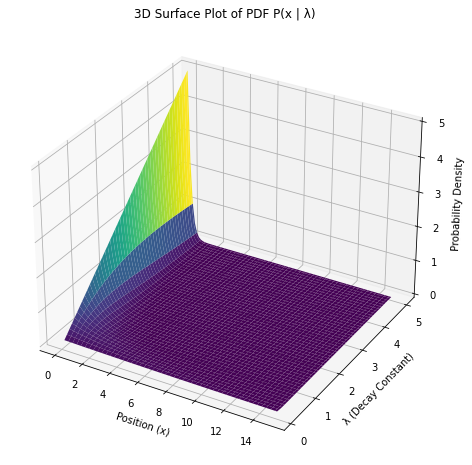

In [91]:
# Example usage:
# Create a particle with a decay constant and position
particle = Particle(0.4, 5)

# Generate and save a 3D surface plot
particle.generate_surface_plot(lambda_range=(0.1, 5), x_range=(0, 15), save_path='surface_plot.png')

<div style="text-align: center;">
    <h3><strong> Unknown Particle Decay </strong></h3>
</div>
<br>
You are given two datasets that record the decay distances of approximately $10^4$ data points in both a vacuum and an optical cavity. In this question, you are asked to infer the values of the decay constants, $\lambda$, under both conditions. The measurement files are 'Vacuum_decay_dataset.json' and 'Cavity_decay_dataset.json.' Here are snapshots of the data. 




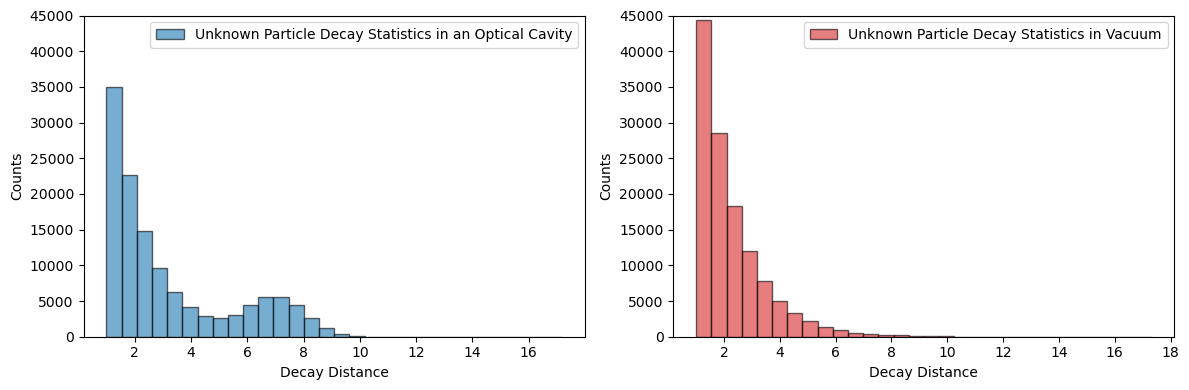

## E)
You can observe that the optical cavity modifies a fraction of particles into a different type with distinct decay properties. What are the decay constants in both cases? How can you define the decay constant in the presence of an optical cavity? What additional structures have you observed? Let's assume the second particle type follows a Gaussian probability distribution function:
$$\mathcal{F}(x\ |\ \mu, \sigma)= \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}. $$
For simplicity, you can consider that the observed decay counts in an optical cavity are proportional to:
$\sim \mathcal{F}(x\ |\ \mu, \sigma) +P(x\ |\ \lambda) $. What are the parameters $\mu, \sigma, \lambda$ that best fit the data? Please provide your explanations and any relevant code.

In [176]:
import json
import numpy as np
from scipy.optimize import curve_fit
                
# Define the file path for the JSON file
json_file_path_1 = 'problem_2/Vacuum_decay_dataset.json'
json_file_path_2 = 'problem_2/Cavity_decay_dataset.json'

# Read the boolean data from the JSON file into a Python list
with open(json_file_path_1, 'r') as json_file_1:
    vacuum_data = json.load(json_file_1)
with open(json_file_path_2, 'r') as json_file_2:
    cavity_data = json.load(json_file_2)

# Define the optical cavity model
def optical_cavity_model(x, 𝜇, 𝜎, 𝜆):
    return (1 / (𝜎 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - 𝜇) / 𝜎) ** 2) + 𝜆 * np.exp(-𝜆 * x)

# Combine the data
x_data = np.concatenate([vacuum_data, cavity_data])
y_data = np.arange(1, len(x_data) + 1)  # Generate synthetic counts for the data points

# Initial guess values for the curve_fit function
𝜇_guess = 1.0
𝜎_guess = 1.0
𝜆_guess = 1.0

initial_guess = [𝜇_guess, 𝜎_guess, 𝜆_guess]

# Fit the optical cavity data to the model
popt, _ = curve_fit(optical_cavity_model, x_data, y_data, p0=initial_guess)

𝜇_best, 𝜎_best, 𝜆_best = popt

print("Best-fit parameters for the optical cavity case:")
print("𝜇_best:", 𝜇_best)
print("𝜎_best:", 𝜎_best)
print("𝜆_best:", 𝜆_best)

# Define the vacuum decay model
def vacuum_decay_model(x, 𝜆_vacuum):
    return 𝜆_vacuum * np.exp(-𝜆_vacuum * x)

# Initial guess value for the curve_fit function
𝜆_guess_vacuum = 1.0

# Fit the vacuum data to the vacuum model
popt_vacuum, _ = curve_fit(vacuum_decay_model, x_data, y_data, p0=𝜆_guess_vacuum)

𝜆_vacuum_best = popt_vacuum

print("\nBest-fit parameter for the vacuum case:")
print("𝜆_vacuum_best:", 𝜆_vacuum_best)


/var/folders/r0/yh777dl94dbcjct2hckw5p8c0000gn/T/ipykernel_13615/2070646546.py:17: RuntimeWarning: overflow encountered in exp
  return (1 / (𝜎 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - 𝜇) / 𝜎) ** 2) + 𝜆 * np.exp(-𝜆 * x)
/var/folders/r0/yh777dl94dbcjct2hckw5p8c0000gn/T/ipykernel_13615/2070646546.py:17: RuntimeWarning: overflow encountered in multiply
  return (1 / (𝜎 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - 𝜇) / 𝜎) ** 2) + 𝜆 * np.exp(-𝜆 * x)


Best-fit parameters for the optical cavity case:
𝜇_best: 1.3615222544102705
𝜎_best: 0.15321292716323567
𝜆_best: 0.5433446399167481

Best-fit parameter for the vacuum case:
𝜆_vacuum_best: [0.54674549]


/var/folders/r0/yh777dl94dbcjct2hckw5p8c0000gn/T/ipykernel_13615/2070646546.py:42: RuntimeWarning: overflow encountered in exp
  return 𝜆_vacuum * np.exp(-𝜆_vacuum * x)
/var/folders/r0/yh777dl94dbcjct2hckw5p8c0000gn/T/ipykernel_13615/2070646546.py:42: RuntimeWarning: overflow encountered in multiply
  return 𝜆_vacuum * np.exp(-𝜆_vacuum * x)


<div style="text-align: center;">
    <h2><strong> Moment Generating Function (MGF)  </strong></h2>
</div>

The MGF of a random variable $x$ is denoted as $M(t)$, where $t$ is a real number. It is defined as:
$$M(t|\ \lambda) \sim \int dx e^{t x} P(x\ |\ \lambda). $$ It generates moments by differentiation:
$$\frac{\partial}{\partial t} M(t|\ \lambda)\big|_{t=0} \sim \int dx \big( x P(x\ |\ \lambda) \big) $$
The key idea is to take successive derivatives of the MGF with respect to the parameter $t$ and evaluate them at $t = 0$. Each derivative, when evaluated at $t = 0$, corresponds to a specific moment of the random variable. The process is systematic, and it allows you to calculate moments of different orders (mean, variance, skewness, kurtosis, etc.) in a structured way.



<div style="text-align: center;">
    <h3><strong> MGF of the decay process  </strong></h3>
</div>

Let's recal the probability density function in **Problem 2**,
$$P(x\ |\ \lambda) = \frac{1}{ Z(\lambda)} \frac{1}{\lambda}e^{-x/\lambda}\ \ \ \ \ \ 0 < x < \infty
$$
where
$$ Z(\lambda) = \int_0^\infty dx \frac{1}{\lambda}e^{-x/\lambda} = e^{-1/\lambda} . $$



## A) 
What is the MGF for the above probability density function? Calculate the above condition **analytically**,
<br> 
$M(t|\ \lambda)$ = $\int dxe^{tx}\frac{1}{e^\frac{-1}{\lambda}}\frac{1}{\lambda}e^{\frac{-x}{\lambda}}$
<br><br> **Steps:** $M(t|\ \lambda) \sim \int dx e^{t x} P(x\ |\ \lambda)$ = $\int dxe^{tx}\frac{1}{e^\frac{-1}{\lambda}}\frac{1}{\lambda}e^{\frac{-x}{\lambda}}$

## B) 
Using the above result, calculate the mean and variance **analytically**
<br> 
For $\lambda$ = 1, mean = $-e^{1-x}$, variance = $-e^{1-x^2}$

## C) 
**Numerically** evaluate (finite differences) the first-order derivative and the second-order derivative that yield the mean and variance at various $\lambda$ values. Plot the analytical functions against the numerical results. 

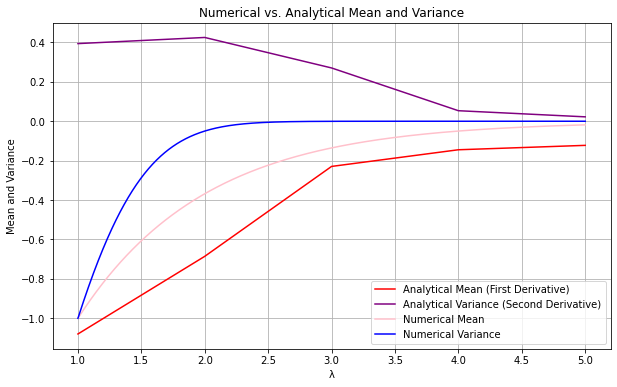

In [198]:
import numpy as np
import matplotlib.pyplot as plt

# Define the probability density function P(x | λ)
def probability_density_function(x, λ):
    return (1/np.exp(-1/λ)) * (1/λ) * np.exp(-x/λ)

# Define the moment generating function M(t | λ)
def moment_generating_function(t, λ):
    integrand = lambda x: np.exp(t * x) * probability_density_function(x, λ)
    return np.trapz(integrand(np.linspace(0, 10, 1000)), dx=0.01)

# Specify λ values
λ_values = [1, 2, 3, 4, 5]

# Set t = 0
t = 0

# Calculate the numerical first and second derivatives at t = 0 using finite differences
step_size = λ_values[1] - λ_values[0]

analytical_mean_derivative = np.gradient([moment_generating_function(t, λ) for λ in λ_values], step_size)
analytical_variance_derivative = np.gradient(analytical_mean_derivative, step_size)

x=np.linspace(1,5,1000)

# Create plots to compare numerical and analytical results
plt.figure(figsize=(10, 6))
plt.plot(λ_values, analytical_mean_derivative, color="red", label='Analytical Mean (First Derivative)')
plt.plot(λ_values, analytical_variance_derivative, color="purple", label='Analytical Variance (Second Derivative)')
plt.plot(x, -np.exp(1-x), color = "pink", label='Numerical Mean')
plt.plot(x, -np.exp(1-x**2), color = "blue", label='Numerical Variance')

plt.xlabel('λ')
plt.ylabel('Mean and Variance')
plt.title('Numerical vs. Analytical Mean and Variance')
plt.legend()
plt.grid()
plt.show()

<div style="text-align: center;">
    <h3><strong> MGF of a biased coin  </strong></h3>
</div>

Let's recal the likelihood function (probability mass function) in **Problem 1** ,
<br>
$$ P(M,N|p) = \binom{N}{M} p^{M} (1-p)^{N-M}. $$
<br>

## D) 
What is the MGF for the above probability mass function? Calculate the above condition **analytically**,
<br> 

M(t) = $(1-p+pe^t)^N$
<br>
<br> <br> 
Hint, you should consider the sum,  
$$M(t) = \sum_{x=0}^{n} e^{tx} \binom{n}{x} p^x (1-p)^{n-x}$$
and use the fact,
$$(a + b)^n = \sum_{k=0}^{n} \binom{n}{k} a^{n-k} b^k$$

## E) 
Using the above result, calculate the mean and variance **analytically**,
<br> 

<br><br> **Steps:** <br> 
mean = Np
<br> 
variance = $Np(q+p)^(N-2)(q+Np)$

## F) 
**Numerically** evaluate (finite differences) the first-order derivative and the second-order derivative that yield the mean and variance at various $\lambda$ values. Plot the analytical functions against the numerical results. 

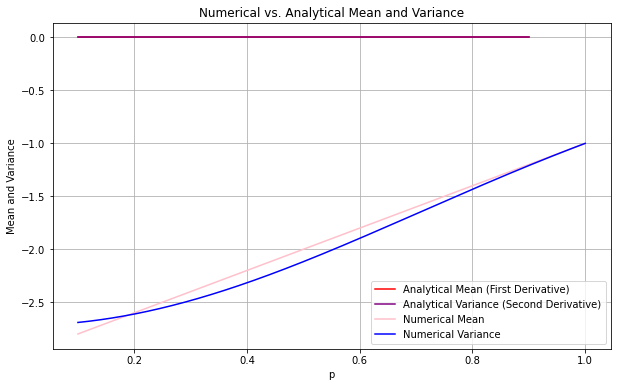

In [212]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Define the probability function P(M, N | p)
def probability_function(M, N, p):
    return comb(N, M) * (p**M) * ((1 - p)**(N - M))

# Define the moment generating function M(t, N, p)
def moment_generating_function(t, N, p):
    result = 0
    for M in range(N + 1):
        result += np.exp(t * M) * comb(N, M) * (p**M) * ((1 - p)**(N - M))
    return result

# Specify p values
p_values = [0.1, 0.3, 0.5, 0.7, 0.9]

# Set N and M values
N = 10
M = 5

# Set t = 0
t = 0

# Calculate the numerical first and second derivatives at t = 0 using finite differences
step_size = p_values[1] - p_values[0]

analytical_mean_derivative = np.gradient([moment_generating_function(t, N, p) for p in p_values], step_size)
analytical_variance_derivative = np.gradient(analytical_mean_derivative, step_size)

x=np.linspace(0.1, 1 ,1000)

# Create plots to compare numerical and analytical results
plt.figure(figsize=(10, 6))
plt.plot(p_values, analytical_mean_derivative, color="red",  label='Analytical Mean (First Derivative)')
plt.plot(p_values, analytical_variance_derivative, color="purple",  label='Analytical Variance (Second Derivative)')
plt.plot(x, 2*x-3, color = "pink", label='Numerical Mean')
plt.plot(x, -np.exp(1-x**2), color = "blue", label='Numerical Variance')
plt.xlabel('p')
plt.ylabel('Mean and Variance')
plt.title('Numerical vs. Analytical Mean and Variance')
plt.legend()
plt.grid()
plt.show()